# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np

from metabatt.utils import calculate_beam_lengths
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

# temp
import matplotlib.pyplot as plt
from metabatt.geometry import rotate_line,\
    rotate_point,\
    angle_between,\
    normalize,\
    p_to_p_distance,\
    wrap_points_in_pbc
from metabatt.shapes import LineShape, SineWaveHalf, SineWave

In [2]:
cell_size = [2, 2]
original_angles = [0, 30, 60, 90, 120, 150, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)

# we start from scratch here
print(f"{lengths=} {angles=}")

# start by making an empty unit cell
graph = Graph(n_cells_w=3,  # dimension width
              n_cells_h=3,  # dimension height
              node_size=1e-2,
              eps_edge_overlaps=1e-3,
              max_edge_length=1.5, # reduces computational time if known
              pbc=[True, True]) # apply periodic boundary conditions

if not any(node.node_id == 0 for node in graph.nodes): graph.add_node(node_id=0, position=[0.0, 0.0])
if not any(node.node_id == 1 for node in graph.nodes): graph.add_node(node_id=1, position=[1.0, 0.0])
graph.add_edge(Edge(graph.get_node(0), graph.get_node(1), graph))

graph.assign_rotation_to_nodes()
graph.bend_edges()

lengths=[0.5, 1.0, 1.118033988749895] angles=[0, 26.565051177077994, 90, 153.434948822922, 180]


4.240000000000001


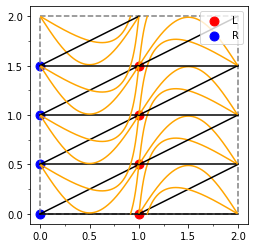

In [3]:
def add_subgraph(graph, angles, lengths, node_idx, angle_idx, lenght_idx):
    subgraph = Subgraphs(angles, lengths, node=graph.get_node(node_idx)).get_subgraph(angles[angle_idx], lengths[lenght_idx])
    graph.add_subgraph_to_node(graph.get_node(node_idx), subgraph)
    
add_subgraph(graph, angles, lengths, 1, 0, 1)
add_subgraph(graph, angles, lengths, 0, 1, 2)
add_subgraph(graph, angles, lengths, 1, 1, 2)

add_subgraph(graph, angles, lengths, 2, 0, 1)
add_subgraph(graph, angles, lengths, 3, 0, 1)
add_subgraph(graph, angles, lengths, 2, 1, 2)
add_subgraph(graph, angles, lengths, 3, 1, 2)

add_subgraph(graph, angles, lengths, 4, 0, 1)
add_subgraph(graph, angles, lengths, 5, 0, 1)
add_subgraph(graph, angles, lengths, 4, 1, 2)
add_subgraph(graph, angles, lengths, 5, 1, 2)

add_subgraph(graph, angles, lengths, 6, 0, 1)
add_subgraph(graph, angles, lengths, 7, 0, 1)
add_subgraph(graph, angles, lengths, 6, 1, 2)
add_subgraph(graph, angles, lengths, 7, 1, 2)

print(graph.get_graph_score())
graph.plot()

In [4]:
def add_edge(graph, edge):
    if not graph.edge_exists_already(edge):
        graph.add_edge(edge)
    print(f"Added [{edge.node1.position[0]:.2f}, {edge.node1.position[1]:.2f}] => [{edge.node2.position[0]:.2f}, {edge.node2.position[1]:.2f}]")

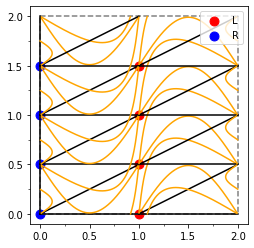

Score with frustrated edges: 4.740000000000001


In [4]:
graph.add_frustrated_edges()
graph.plot()
print(f"Score with frustrated edges: {graph.get_graph_score()}")

reward=4.740000000000001


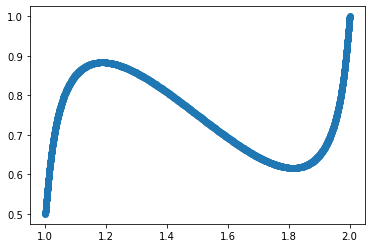

In [7]:
# origin=array([1. , 0.5]), p2=array([1.16773444e-16, 1.00000000e+00]), rotation_dir='L', pbc=[True, True], cell=array([[2, 0], [0, 2]]), v=array([1. , 0.5]), A=0.5488000000000001, eps_discretize=0.001
half_sin = SineWave(origin=[1. , 0.5], p2=[1.16773444e-16, 1.00000000e+00], rotation_dir='L', pbc=[True, True], cell=[[2, 0], [0, 2]], v=[1. , 0.5], A=0.5488000000000001, eps_discretize=0.001)
half_sin.values

plt.scatter(half_sin.values[:, 0], half_sin.values[:, 1])
plt.show()

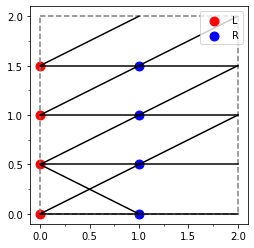

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()